In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv'

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# One Hot Encoding On Categorical Columns
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
Y = df['Exited']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [58]:
# So we will have 1 input layer,1 hidden layer and 1 output layer.
model = Sequential()
# this is our hidden layer with 11 nodes and connected with 11 inputs means columns
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
# this is our output layer with one node 
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [61]:
# we are storing this dictionary in vairable and we can plot the graph at the different stages of epochs and we can see how our model perform
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7325 - loss: 0.5980 - val_accuracy: 0.7975 - val_loss: 0.4809
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4669 - val_accuracy: 0.8044 - val_loss: 0.4454
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4328 - val_accuracy: 0.8025 - val_loss: 0.4289
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss: 0.4185 - val_accuracy: 0.8175 - val_loss: 0.4129
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.3978 - val_accuracy: 0.8306 - val_loss: 0.3962
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.3909 - val_accuracy: 0.8375 - val_loss: 0.3833
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.3769 - val_accuracy: 0.8456 - val_loss: 0.3711
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3757 - val_accu

In [53]:
# in this output we have 33 weights from our first between input and hidden layer with 3 bias Total = 36 
model.layers[0].get_weights()

[array([[ 5.02609387e-02, -1.36517256e-01,  9.44687612e-03,
          1.34590670e-01, -6.59529716e-02,  1.60841104e-02,
          3.49059738e-02,  3.05831373e-01, -2.75462549e-02,
          1.23092264e-01, -1.06044196e-01],
        [ 3.30721527e-01,  2.22256675e-01, -6.28955066e-01,
          5.94781458e-01, -7.16059446e-01,  3.21568474e-02,
         -1.33563399e-01, -5.84855676e-01,  2.27059230e-01,
         -6.23216748e-01, -7.41297364e-01],
        [ 1.69619486e-01,  1.83704659e-01,  2.31183380e-01,
         -1.24061383e-01, -1.05516404e-01, -9.09345970e-02,
         -1.65369108e-01, -3.47910225e-01,  5.44896796e-02,
         -1.91215888e-01,  4.00304608e-02],
        [ 1.23082809e-01, -3.83604348e-01,  5.64104840e-02,
         -1.22144029e-01,  3.47532630e-01,  1.83119953e-01,
         -2.90966123e-01, -2.26645201e-01, -5.82456231e-01,
         -7.08817912e-04, -4.29805517e-01],
        [ 5.26218638e-02, -7.86108989e-03, -3.98976088e-01,
          2.50511318e-01,  1.33366967e-02,  

In [54]:
model.layers[1].get_weights()

[array([[ 5.39240777e-01, -6.50068745e-02,  2.86531858e-02,
         -4.96006072e-01, -3.75378489e-01, -1.03352800e-01,
          3.61295283e-01,  1.48684204e-01, -1.09442151e+00,
          2.07258776e-01,  6.10225737e-01],
        [ 3.75436783e-01,  5.47751427e-01, -9.18778926e-02,
          5.89330085e-02, -5.37925780e-01,  8.31530541e-02,
         -3.36990744e-01,  6.05078220e-01,  3.96058559e-01,
          7.86791816e-02,  5.44785976e-01],
        [ 2.14262709e-01, -3.91886532e-01, -8.89188111e-01,
         -3.05672109e-01, -3.03106487e-01, -8.17106307e-01,
          1.77594990e-01, -7.73874670e-03,  2.59359837e-01,
         -3.74141306e-01, -1.36638686e-01],
        [ 1.85936689e-01, -2.70734310e-01,  5.43276548e-01,
         -1.96663737e-01,  4.80797231e-01, -2.03192413e-01,
          1.41507238e-01,  2.26706341e-01, -3.12463790e-01,
          2.73298115e-01,  6.52729213e-01],
        [ 5.67169249e-01, -6.07203424e-01, -2.43048906e-01,
          3.53296101e-01,  3.24842811e-01, -

In [55]:
# Prediction 
Y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [56]:
Y_pred = np.where(Y_log>0.5,1,0)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.86

In [62]:
import matplotlib.pyplot as plt

In [63]:
history.history

{'accuracy': [0.7770312428474426,
  0.7985937595367432,
  0.8056250214576721,
  0.8193749785423279,
  0.8315625190734863,
  0.8412500023841858,
  0.8490625023841858,
  0.8534374833106995,
  0.8535937666893005,
  0.8579687476158142,
  0.860156238079071,
  0.8598437309265137,
  0.8607812523841858,
  0.8609374761581421,
  0.8634374737739563,
  0.862500011920929,
  0.8620312213897705,
  0.8643749952316284,
  0.8654687404632568,
  0.8643749952316284,
  0.8648437261581421,
  0.8646875023841858,
  0.8653125166893005,
  0.864062488079071,
  0.8646875023841858,
  0.86328125,
  0.8654687404632568,
  0.8650000095367432,
  0.8660937547683716,
  0.8654687404632568,
  0.8665624856948853,
  0.8681250214576721,
  0.8643749952316284,
  0.8659374713897705,
  0.8657812476158142,
  0.8667187690734863,
  0.8654687404632568,
  0.8646875023841858,
  0.8642187714576721,
  0.8668749928474426,
  0.8634374737739563,
  0.8665624856948853,
  0.8670312762260437,
  0.8673437237739563,
  0.8651562333106995,
  0.86624

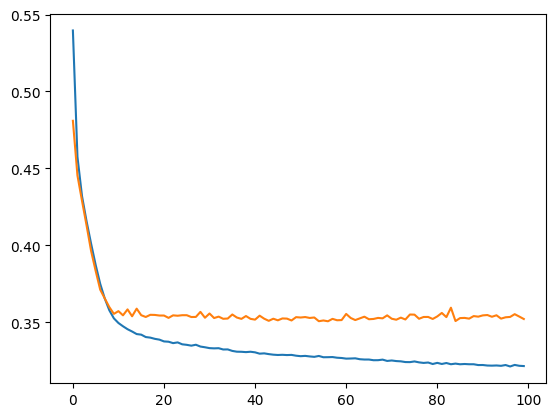

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


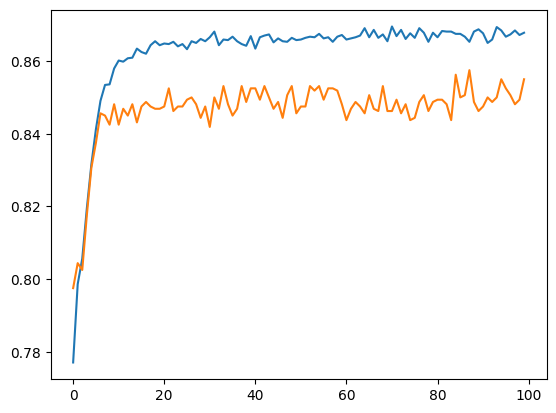

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])